# Representation and Visualization of Data

Machine learning is about fitting models to data; for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being "zeros" for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than NumPy arrays.

As we recall from the previous section (or Jupyter notebook), we represent samples (data points or instances) as rows in the data array, and we store the corresponding features, the "dimensions," as columns.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different iris flower species.  There are three different species of iris
in this particular dataset as illustrated below:

Iris Setosa
<img src="figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">



### Quick Question:

**Let's assume that we are interested in categorizing new observations; we want to predict whether unknown flowers are  Iris-Setosa, Iris-Versicolor, or Iris-Virginica flowers, respectively. Based on what we've discussed in the previous section, how would we construct such a dataset?***

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number *j* must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

For future experiments with machine learning algorithms, we recommend you to bookmark the [UCI machine learning repository](http://archive.ics.uci.edu/ml/), which hosts many of the commonly used datasets that are useful for benchmarking machine learning algorithms -- a very popular resource for machine learning practioners and researchers. Conveniently, some of these datasets are already included in scikit-learn so that we can skip the tedious parts of downloading, reading, parsing, and cleaning these text/CSV files. You can find a list of available datasets in scikit-learn at: http://scikit-learn.org/stable/datasets/#toy-datasets.

For example, scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [3]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [4]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

Using the NumPy's bincount function (above), we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

These class names are stored in the last attribute, namely ``target_names``:

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize one or two of the dimensions
at a time using a simple histogram or scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

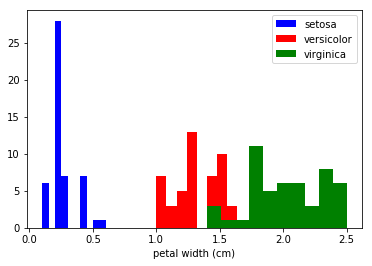

In [9]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

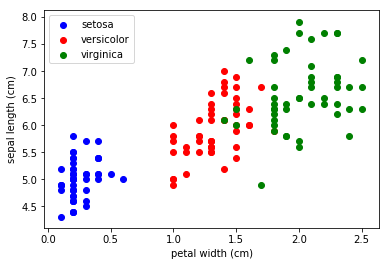

In [10]:
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      **Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**
      </li>
      <li>
      This exercise is a preview of **dimensionality reduction**, which we'll see later.
      </li>
    </ul>
</div>

### An aside: scatterplot matrices

Instead of looking at the data one plot at a time, a common tool that analysts use is called the **scatterplot matrix**.

Scatterplot matrices show scatter plots between all features in the data set, as well as histograms to show the distribution of each feature.

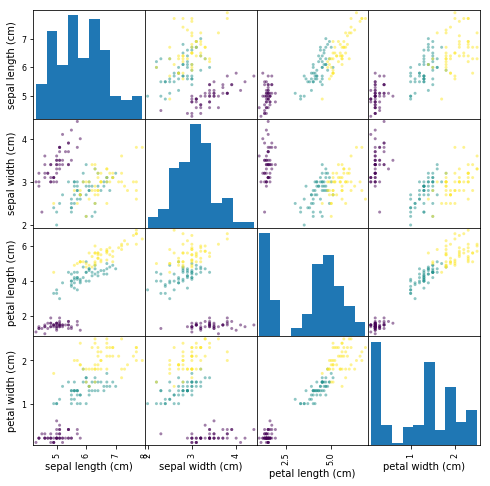

In [11]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8, 8));

## Other Available Data

[Scikit-learn makes available a host of datasets for testing learning algorithms](http://scikit-learn.org/stable/datasets/#dataset-loading-utilities).
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>

to see a list of available functions.

In [12]:
from sklearn import datasets

Be warned: many of these datasets are quite large, and can take a long time to download!

If you start a download within the IPython notebook
and you want to kill it, you can use ipython's "kernel interrupt" feature, available in the menu or using
the shortcut ``Ctrl-m i``.

You can press ``Ctrl-m h`` for a list of all ``ipython`` keyboard shortcuts.

## Loading Digits Data

Now we'll take a look at another dataset, one where we have to put a bit
more thought into how to represent the data.  We can explore the data in
a similar manner as above:

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [15]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [16]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


The target here is just the digit represented by the data.  The data is an array of
length 64... but what does this data mean?

There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [17]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


We can see that they're related by a simple reshaping:

In [18]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Let's visualize the data.  It's little bit more involved than the simple scatter-plot
we used above, but we can do it rather quickly.

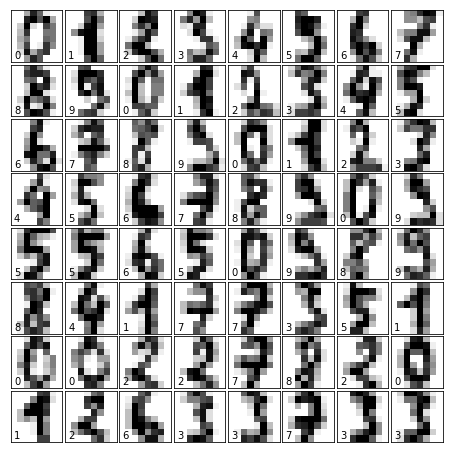

In [19]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We see now what the features mean.  Each feature is a real-valued quantity representing the
darkness of a pixel in an 8x8 image of a hand-written digit.

Even though each sample has data that is inherently two-dimensional, the data matrix flattens
this 2D data into a **single vector**, which can be contained in one **row** of the data matrix.

<div class="alert alert-success">
    <b>EXERCISE: working with the faces dataset</b>:
     <ul>
      <li>
      Here we'll take a moment for you to explore the datasets yourself.
Later on we'll be using the Olivetti faces dataset.
Take a moment to fetch the data (about 1.4MB), and visualize the faces.
You can copy the code used to visualize the digits above, and modify it for this data.
      </li>
    </ul>
</div>

In [20]:
from sklearn.datasets import fetch_olivetti_faces

In [21]:
# fetch the faces data


In [22]:
# Use a script like above to plot the faces image data.
# hint: plt.cm.bone is a good colormap for this data


### Solution:

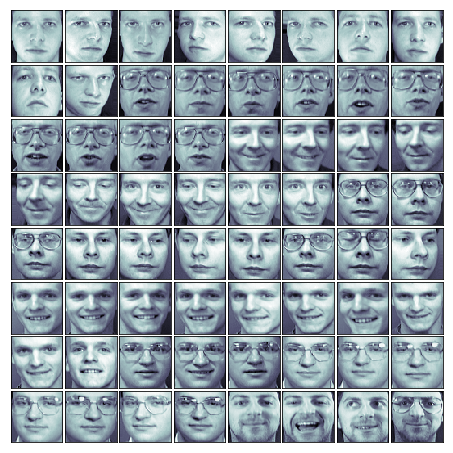

In [23]:
# %load solutions/03A_faces_plot.py
faces = fetch_olivetti_faces()

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces:
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
